In [5]:
# Visualize model performance on validation set

import csv
import pandas as pd
import matplotlib.pyplot as plt

#read in dataframe of all bbox comparisons
compare_file = '/home/cara/oregon_critters/both/runs/detect/9_mc_both_med/predict_on_ground/pred_true_compare.csv'
false_neg_file = '/home/cara/oregon_critters/both/runs/detect/9_mc_both_med/predict_on_ground/pred_false_neg.csv'

preds_df = pd.read_csv(compare_file)
fn_df = pd.read_csv(false_neg_file)

preds_df.head()

,Unnamed: 0,pred_box,pred_image,pred_class,confidence,match,true_box,true_class,iou,class_match,image_name,cam_type,project,day_night,group
0,0,0,21808-3__21808-3-G__2021-05-10__08-24-08(1)_fm,AmericanRobin,0.583495,True,0,CanadaJay,0.887314,False,21808-3__21808-3-G__2021-05-10__08-24-08(1)_fm,G,COA_2021,night,val
1,1,1,21808-3__21808-3-G__2021-05-10__08-24-08(1)_fm,PileatedWoodpecker,0.336987,True,0,CanadaJay,0.927059,False,21808-3__21808-3-G__2021-05-10__08-24-08(1)_fm,G,COA_2021,night,val
2,2,2,21808-3__21808-3-G__2021-05-10__08-24-08(2)_fm,AmericanRobin,0.608518,True,1,CanadaJay,0.934696,False,21808-3__21808-3-G__2021-05-10__08-24-08(2)_fm,G,COA_2021,night,val
3,3,3,21808-3__21808-3-G__2021-05-10__08-24-08(2)_fm,StellersJay,0.375389,True,1,CanadaJay,0.931999,False,21808-3__21808-3-G__2021-05-10__08-24-08(2)_fm,G,COA_2021,night,val
4,4,4,21189-4__21189-4-G__2021-04-11__08-26-11(1)_do,RooseveltElk,0.118460,True,8,Cougar,0.801381,False,21189-4__21189-4-G__2021-04-11__08-26-11(1)_do,G,COA_2021,night,val


In [11]:
# Refine true pos / false pos / true neg / false neg 
# **these calculations are much more complicated than I am actually doing here**

preds_df['error_type'] = preds_df['class_match'].apply(lambda value: 'TP' if value else 'FP')


Text(0.5, 1.0, 'Confidence scores on validation set')

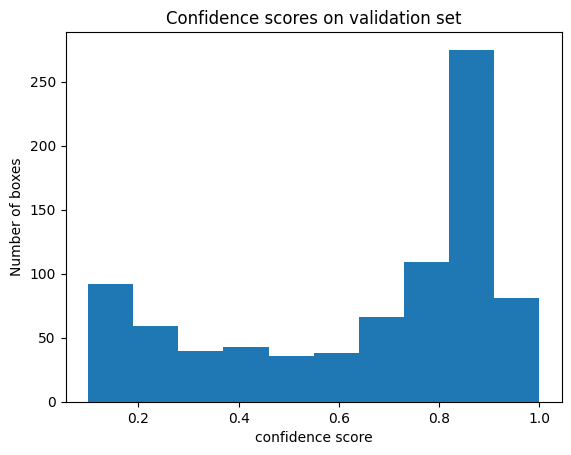

In [12]:
# Now make histograms of *all* scores. How confident is the model?

#all scores
plt.hist(preds_df['confidence'])
plt.xlabel('confidence score')
plt.ylabel('Number of boxes')
plt.title('Confidence scores on validation set')


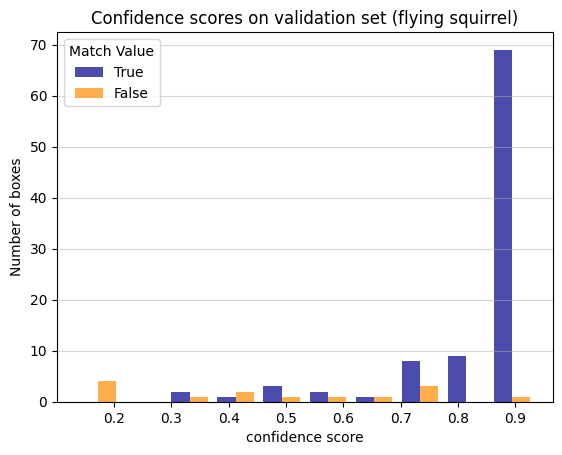

In [20]:
# Do this by species

#single-species
preds_sp = preds_df[preds_df['true_class'] == 'FlyingSquirrel'] #choose a species
#plt.hist(preds_sp['confidence'])
plt.xlabel('confidence score')
plt.ylabel('Number of boxes')
plt.title('Confidence scores on validation set (flying squirrel)')

#color by true/false pos
plt.hist([preds_sp[preds_sp['class_match'] == True]['confidence'], 
          preds_sp[preds_sp['class_match'] == False]['confidence']],
          bins=10, alpha=0.7, color=['darkblue', 'darkorange'], label=['True', 'False'])

#customize appearance: 
plt.grid(axis='y', alpha=0.5) #grid lines
plt.xticks(fontsize=10) #tick labels
plt.yticks(fontsize=10) #tick labels
plt.legend(loc='upper right', shadow=True, fontsize=10) #legend with shadow
plt.legend().set_title("Match Value", prop={"size": 10}) #legend title 

# Display the plot
#plt.tight_layout()  # Adjust layout
#plt.show()